In [3]:
import os
import pandas as pd

# Ruta absoluta relativa a la raíz del proyecto
data_path = os.path.join("..", "data", "athlete_events.csv")  # ".." sube una carpeta
df = pd.read_csv(data_path)

print("Celda 2 completada: CSV cargado correctamente")
df.head()



Celda 2 completada: CSV cargado correctamente


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [1]:
# ============================
# 3. Preprocesamiento
# ============================

# Convertir Medals NaN a 'NoMedal'
df['Medal'] = df['Medal'].fillna('NoMedal')

# Crear columna binaria: 1 si tiene medalla, 0 si no
df['Medaled'] = (df['Medal'] != 'NoMedal').astype(int)

# Filtrar solo Summer Olympics (opcional)
df = df[df['Season'] == 'Summer']

# Imputar valores faltantes
df['Height'] = df.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.median()))
df['Weight'] = df.groupby('Sport')['Weight'].transform(lambda x: x.fillna(x.median()))
df['Age'] = df['Age'].fillna(df['Age'].median())

print("Celda 3 completada: preprocesamiento inicial listo")
df.head()


NameError: name 'df' is not defined

In [5]:
# ============================
# 4. Features y particionado
# ============================

from sklearn.model_selection import train_test_split

num_cols = ['Age', 'Height', 'Weight']
cat_cols = ['Sex', 'Sport', 'Team']

X = df[num_cols + cat_cols]
y = df['Medaled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RSEED
)

print("Celda 4 completada: train/test dividido")


Celda 4 completada: train/test dividido


In [ ]:
# ============================
# 5. Pipeline y modelo
# ============================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Transformadores
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# Pipeline completo
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=RSEED, class_weight='balanced'))
])

# Entrenar
pipe_rf.fit(X_train, y_train)

print("Celda 5 completada: modelo Random Forest entrenado")


              precision    recall  f1-score   support

           0       0.87      0.84      0.86     56540
           1       0.27      0.34      0.30     10226

    accuracy                           0.76     66766
   macro avg       0.57      0.59      0.58     66766
weighted avg       0.78      0.76      0.77     66766



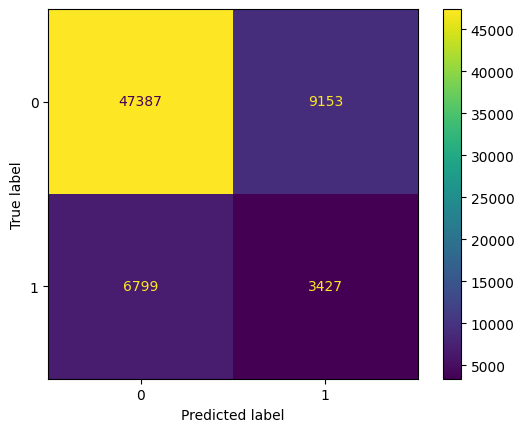

Celda 6 completada: evaluación terminada


In [11]:
# ============================
# 6. Evaluación
# ============================

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = pipe_rf.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test)
plt.show()

print("Celda 6 completada: evaluación terminada")


In [ ]:
# ============================
# 7. Predicción de ejemplo
# ============================

example = pd.DataFrame([{
    'Age': 25,
    'Height': 173,
    'Weight': 80,
    'Sex': 'M',
    'Sport': 'Athletics',
    'Team': 'USA'
}])

pred = pipe_rf.predict(example)
proba = pipe_rf.predict_proba(example)[0,1]

print(f"Predicción de medalla: {pred[0]} (probabilidad: {proba:.2f})")
print("Celda 7 completada: predicción realizada")


In [7]:
 # ============================
# 7. Predicción de ejemplo
# ============================

example = pd.DataFrame([{
    'Age': 21,
    'Height': 185,
    'Weight': 85,
    'Sex': 'M',
    'Sport': 'Athletics',
    'Team': 'USA'
}])

pred = pipe_rf.predict(example)
proba = pipe_rf.predict_proba(example)[0,1]

print(f"Predicción de medalla: {pred[0]} (probabilidad: {proba:.2f})")
print("Celda 7 completada: predicción realizada")

IndexError: list index out of range

In [1]:
 # ============================
# 7. Predicción de ejemplo
# ============================

example = pd.DataFrame([{
    'Age': 24,
    'Height': 182,
    'Weight': 75,
    'Sex': 'M',
    'Sport': 'swimming',
    'Team': 'USA'
}])

pred = pipe_rf.predict(example)
proba = pipe_rf.predict_proba(example)[0,1]

print(f"Predicción de medalla: {pred[0]} (probabilidad: {proba:.2f})")
print("Celda 7 completada: predicción realizada")

NameError: name 'pd' is not defined